<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw

In [2]:
all_pics = np.empty(0)
all_pics

array([], dtype=float64)

In [3]:
def import_pics(base_path):
    all_pics = list()
    all_labels = list()
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [4]:
base_path = r'data/200_species_train/'
X_train, y_train = import_pics(base_path)

In [5]:
len(X_train), len(y_train)

(27503, 27503)

In [6]:
base_path = r'data/200_species_valid/'
X_val, y_val = import_pics(base_path)

In [7]:
len(X_val), len(y_val)

(1000, 1000)

In [8]:
flat_X_train = np.array([x.flatten() for x in X_train])

In [9]:
X_train.shape

(27503, 224, 224, 3)

In [10]:
flat_X_train.shape

(27503, 150528)

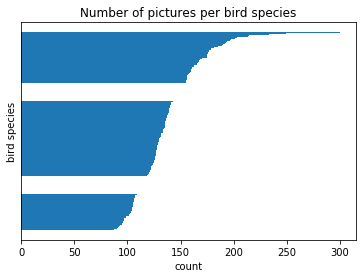

In [11]:
birds_counts = pd.DataFrame(np.unique(y_train,return_counts=True)).T.sort_values(by=1)
plt.barh(birds_counts[0],birds_counts[1]);
plt.yticks([]);
plt.ylabel("bird species")
plt.xlabel("count")
plt.title("Number of pictures per bird species")
plt.show;

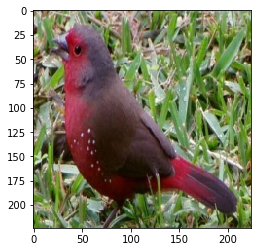

In [12]:
plt.imshow(X_train[0])

In [72]:
inds_4testing = range(581)

In [73]:
sub_y = y_train[inds_4testing]

In [74]:
pd.Series(sub_y).value_counts()

AMERICAN AVOCET         179
ALEXANDRINE PARAKEET    165
AFRICAN FIREFINCH       140
ALBATROSS                97
dtype: int64

In [75]:
sub_X = X_train[inds_4testing]

In [76]:
sub_X.shape

(581, 224, 224, 3)

In [80]:
sub_X_flat = np.array([x.flatten() for x in sub_X])

In [81]:
sub_X_flat.shape

(581, 150528)

In [82]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier

nbc = BernoulliNB(binarize=0)
nbc.fit(sub_X_flat,sub_y)


BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [83]:
pred_sub = nbc.predict(sub_X_flat)

In [115]:
pd.Series(sub_y).value_counts()

AMERICAN AVOCET         179
ALEXANDRINE PARAKEET    165
AFRICAN FIREFINCH       140
ALBATROSS                97
dtype: int64

In [113]:
from sklearn import metrics

print("accuracy is",round(metrics.accuracy_score(sub_y,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y,pred_sub,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y,pred_sub),index=np.unique(sub_y),columns=np.unique(sub_y))

accuracy is 0.432
average recall is 0.432
average precision is 0.736


AFRICAN FIREFINCH  ALBATROSS  ALEXANDRINE PARAKEET  \
AFRICAN FIREFINCH                    22          0                     2   
ALBATROSS                             0         10                     3   
ALEXANDRINE PARAKEET                  0          1                    43   
AMERICAN AVOCET                       1          0                     2   

                      AMERICAN AVOCET  
AFRICAN FIREFINCH                 116  
ALBATROSS                          84  
ALEXANDRINE PARAKEET              121  
AMERICAN AVOCET                   176

That's all fucked up. we can see by the confusion matrix that most of the pictures were classified as **AMERICAN AVOCET**.

Is this because its value is three so the weight of it is higher?